## Importing Essential Libraries

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

#dataset import
dataset = pd.read_csv('data.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [2]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:36].values
y = dataset.iloc[:,36:37].values
y[10:40]

array([['Graduate'],
       ['Graduate'],
       ['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ['Dropout'],
       ['Enrolled'],
       ['Graduate'],
       ['Graduate'],
       ['Enrolled'],
       ['Graduate'],
       ['Enrolled'],
       ['Graduate'],
       ['Graduate'],
       ['Graduate'],
       ['Enrolled'],
       ['Graduate'],
       ['Enrolled'],
       ['Graduate'],
       ['Enrolled'],
       ['Enrolled'],
       ['Graduate'],
       ['Enrolled'],
       ['Graduate'],
       ['Graduate'],
       ['Dropout'],
       ['Dropout'],
       ['Dropout'],
       ['Graduate'],
       ['Dropout']], dtype=object)

## One Hot Encoder

In [3]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y[10:40]

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Normalize Data

In [4]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.1)

## Build model

In [6]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Neural network
model = Sequential()
model.add(Dense(units = 36, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 12, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 3, activation = 'softmax'))

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Train model

In [8]:
history = model.fit(X_train, y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
125/125 [==============================] - 4s 5ms/step - loss: 0.9439 - accuracy: 0.5973 - val_loss: 0.6961 - val_accuracy: 0.7359
Epoch 2/600
125/125 [==============================] - 0s 2ms/step - loss: 0.7749 - accuracy: 0.6830 - val_loss: 0.6109 - val_accuracy: 0.7765
Epoch 3/600
125/125 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.7104 - val_loss: 0.5730 - val_accuracy: 0.7856
Epoch 4/600
125/125 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.7302 - val_loss: 0.5542 - val_accuracy: 0.7856
Epoch 5/600
125/125 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.7347 - val_loss: 0.5483 - val_accuracy: 0.7878
Epoch 6/600
125/125 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7405 - val_loss: 0.5412 - val_accuracy: 0.7946
Epoch 7/600
125/125 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7388 - val_loss: 0.5369 - val_accuracy: 0.7991

## Save Model

In [9]:
from tensorflow.keras.models import load_model

In [10]:
model.save('drop_out_predict_model.h5')

In [11]:
later_model = load_model('drop_out_predict_model.h5')

## Evaluate Model

In [12]:
losses = pd.DataFrame(model.history.history)

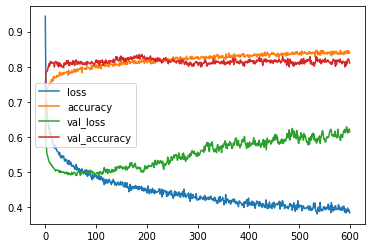

In [13]:
losses.plot()
plt.savefig('evaluate.png')

## Test on a random student

In [24]:
import random
random.seed(87)
random_ind = random.randint(0, len(dataset))

new_student = dataset.drop('Target',axis = 1).iloc[random_ind]
new_student

Marital status                                       1.000000
Application mode                                    17.000000
Application order                                    1.000000
Course                                            9853.000000
Daytime/evening attendance                           1.000000
Previous qualification                               1.000000
Previous qualification (grade)                     125.000000
Nacionality                                          1.000000
Mother's qualification                              19.000000
Father's qualification                              19.000000
Mother's occupation                                  4.000000
Father's occupation                                  7.000000
Admission grade                                    128.500000
Displaced                                            1.000000
Educational special needs                            0.000000
Debtor                                               0.000000
Tuition 

In [25]:
(model.predict(new_student.values.reshape(1,36)) > 0.5).astype("int32")

1/1 [==============================] - 0s 24ms/step


array([[1, 0, 0]])

In [26]:
dataset.iloc[random_ind]['Target']

'Enrolled'

## Get classification_report

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

14/14 [==============================] - 0s 2ms/step


In [23]:
print('Accuracy Score:',accuracy_score(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

Accuracy Score: 0.7697516930022573


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       140
           1       0.50      0.30      0.37        64
           2       0.84      0.87      0.86       239

   micro avg       0.83      0.77      0.80       443
   macro avg       0.75      0.66      0.69       443
weighted avg       0.81      0.77      0.79       443
 samples avg       0.77      0.77      0.77       443



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
